In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd /content/drive/MyDrive/MECD/2º\ ano/Tese/Implementação

In [2]:
# !sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended texlive-latex-recommended cm-super

In [3]:
# !pip install SciencePlots

In [4]:
# !pip install --quiet optuna

In [5]:
import joblib
import time

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import optuna

import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
import seaborn as sns

C:\Users\rendr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
train = pd.read_csv("./data/final_miami_datasets/no_history/train.csv", index_col=[0,1])
train_X = train.iloc[:, :-1]
train_y = train.iloc[:, -1]

val = pd.read_csv("./data/final_miami_datasets/no_history/val.csv")
val_X = val.iloc[:, :-1]
val_y = val.iloc[:, -1]

test = pd.read_csv("./data/final_miami_datasets/no_history/test.csv")
test_X = test.iloc[:, :-1]
test_y = test.iloc[:, -1]

In [7]:
train_X = train_X.values
train_y = train_y.values
val_X = val_X.values
val_y = val_y.values
test_X = test_X.values
test_y = test_y.values

In [8]:
def objective(trial):

  n_neighbors = trial.suggest_int("n_neighbors", 1, 1000)
  weights = trial.suggest_categorical("weights", ["uniform", "distance"])
  p = trial.suggest_int("p", 1, 2)

  ss = StandardScaler()
  knr = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, p=p, n_jobs=-1)
  knr_pipe = Pipeline([("ss", ss), ("knr", knr)])
  knr_pipe = knr_pipe.fit(train_X, train_y)
  preds = knr_pipe.predict(val_X)

  return mean_squared_error(val_y, preds, squared=False)

In [9]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

[I 2024-06-25 16:05:21,208] A new study created in memory with name: no-name-549b3ba2-acaf-48e1-8769-740d26aefb42
[I 2024-06-25 16:05:28,316] Trial 0 finished with value: 260.5911271747081 and parameters: {'n_neighbors': 394, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 260.5911271747081.
[I 2024-06-25 16:05:35,616] Trial 1 finished with value: 260.54572618009604 and parameters: {'n_neighbors': 320, 'weights': 'distance', 'p': 1}. Best is trial 1 with value: 260.54572618009604.
[I 2024-06-25 16:05:47,889] Trial 2 finished with value: 255.74307438343146 and parameters: {'n_neighbors': 616, 'weights': 'distance', 'p': 1}. Best is trial 2 with value: 255.74307438343146.
[I 2024-06-25 16:05:53,000] Trial 3 finished with value: 263.87541949506493 and parameters: {'n_neighbors': 198, 'weights': 'uniform', 'p': 1}. Best is trial 2 with value: 255.74307438343146.
[I 2024-06-25 16:05:54,333] Trial 4 finished with value: 316.34473117259745 and parameters: {'n_neighbors': 4, 'weigh

In [10]:
joblib.dump(study, "./models/knr_study.pkl")

['./models/knr_study.pkl']

In [11]:
def objective(trial):

  hidden_layer_size = trial.suggest_int("hidden_layer_size", 1, 100)
  activation = trial.suggest_categorical("activation", ["logistic", "tanh", "relu"])
  learning_rate_init = trial.suggest_float("learning_rate_init", 0.0001, 1)
  learning_rate = trial.suggest_categorical("learning_rate", ["constant", "invscaling", "adaptive"])
  batch_size = trial.suggest_categorical("batch_size", [32, 64, 128, 256])

  ss = StandardScaler()
  mlp = MLPRegressor(hidden_layer_sizes=(hidden_layer_size,), activation=activation,
                      learning_rate=learning_rate, learning_rate_init=learning_rate_init,
                      batch_size=batch_size, early_stopping=True, shuffle=True)
  mlp_pipe = Pipeline([("ss", ss), ("mlp", mlp)])

  mlp_pipe.fit(train_X, train_y)

  preds = mlp_pipe.predict(val_X)

  return mean_squared_error(val_y, preds, squared=False)

In [12]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

[I 2024-06-25 16:28:31,748] A new study created in memory with name: no-name-c9ec2e1f-a7a0-4634-9951-428154151dd9
[I 2024-06-25 16:28:53,670] Trial 0 finished with value: 263.5550484275777 and parameters: {'hidden_layer_size': 56, 'activation': 'relu', 'learning_rate_init': 0.4882137648549137, 'learning_rate': 'constant', 'batch_size': 128}. Best is trial 0 with value: 263.5550484275777.
[I 2024-06-25 16:30:29,370] Trial 1 finished with value: 256.71723534937365 and parameters: {'hidden_layer_size': 90, 'activation': 'logistic', 'learning_rate_init': 0.6691038260816157, 'learning_rate': 'adaptive', 'batch_size': 64}. Best is trial 1 with value: 256.71723534937365.
[I 2024-06-25 16:30:40,558] Trial 2 finished with value: 260.8504038084266 and parameters: {'hidden_layer_size': 15, 'activation': 'logistic', 'learning_rate_init': 0.3146035585073345, 'learning_rate': 'invscaling', 'batch_size': 256}. Best is trial 1 with value: 256.71723534937365.
[I 2024-06-25 16:31:00,716] Trial 3 finishe

In [13]:
joblib.dump(study, "./models/mlp_study.pkl")

['./models/mlp_study.pkl']

In [14]:
knr_study = joblib.load("./models/knr_study.pkl")
knr_trials_df = knr_study.trials_dataframe(attrs=("number", "value", "params"))
knr_trials_df["best_value"] = knr_trials_df["value"].cummin()
knr_trials_df.columns = ["Trial", "RMSE", "No. Neighbors", "Metric", "Weights", "Best RMSE"]
knr_trials_df["Metric"] = knr_trials_df["Metric"].map({1: "manhattan", 2: "euclidean"})
knr_param_importances = pd.Series(optuna.importance.get_param_importances(knr_study))

In [15]:
knr_trials_df.head()

,Trial,RMSE,No. Neighbors,Metric,Weights,Best RMSE
0,0,260.591127,394,euclidean,distance,260.591127
1,1,260.545726,320,manhattan,distance,260.545726
2,2,255.743074,616,manhattan,distance,255.743074
3,3,263.875419,198,manhattan,uniform,255.743074
4,4,316.344731,4,manhattan,uniform,255.743074


In [16]:
mlp_study = joblib.load("models/mlp_study.pkl")
mlp_trials_df = mlp_study.trials_dataframe(attrs=("number", "value", "params"))
mlp_trials_df["best_value"] = mlp_trials_df["value"].cummin()
mlp_trials_df.columns = ["Trial", "RMSE", "Activation", "Batch Size", "Hidden Layer Size", "Learning Rate", "Learning Rate Init", "Best RMSE"]
mlp_param_importances = pd.Series(optuna.importance.get_param_importances(mlp_study))

In [17]:
mlp_trials_df.head()

,Trial,RMSE,Activation,Batch Size,Hidden Layer Size,Learning Rate,Learning Rate Init,Best RMSE
0,0,263.555048,relu,128,56,constant,0.488214,263.555048
1,1,256.717235,logistic,64,90,adaptive,0.669104,256.717235
2,2,260.850404,logistic,256,15,invscaling,0.314604,256.717235
3,3,263.869029,tanh,128,44,constant,0.842348,256.717235
4,4,262.189455,tanh,32,34,adaptive,0.418246,256.717235


In [18]:
print(knr_study.best_trial.value)
print(mlp_study.best_trial.value)

254.030580196563
250.34475241924508


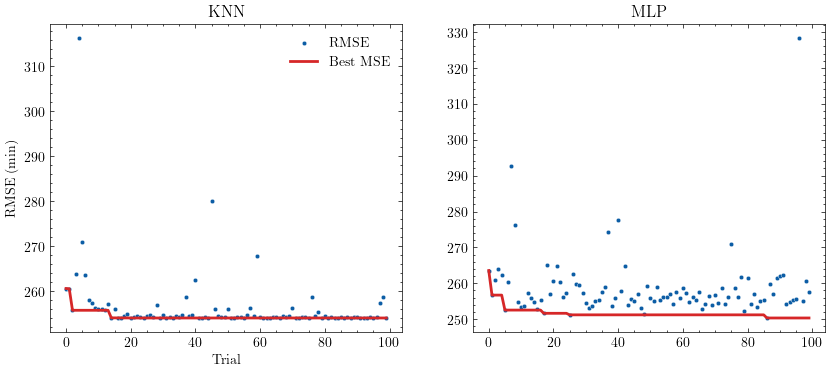

In [19]:
# Optimization History
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(data=knr_trials_df, x="Trial", y="RMSE", s=10, label="RMSE", ax=axs[0])
sns.lineplot(data=knr_trials_df, x="Trial", y="Best RMSE", linewidth=2, color="tab:red", label="Best MSE", ax=axs[0])

sns.scatterplot(data=mlp_trials_df, x="Trial", y="RMSE", s=10, ax=axs[1])
sns.lineplot(data=mlp_trials_df, x="Trial", y="Best RMSE", linewidth=2, color="tab:red", legend=False, ax=axs[1])

axs[0].legend()
axs[0].set_ylabel("RMSE (min)")
axs[0].set_title("KNN")
axs[1].set_title("MLP")
axs[1].set_xlabel("")
axs[1].set_ylabel("")

plt.savefig("./figures/history")
plt.show()

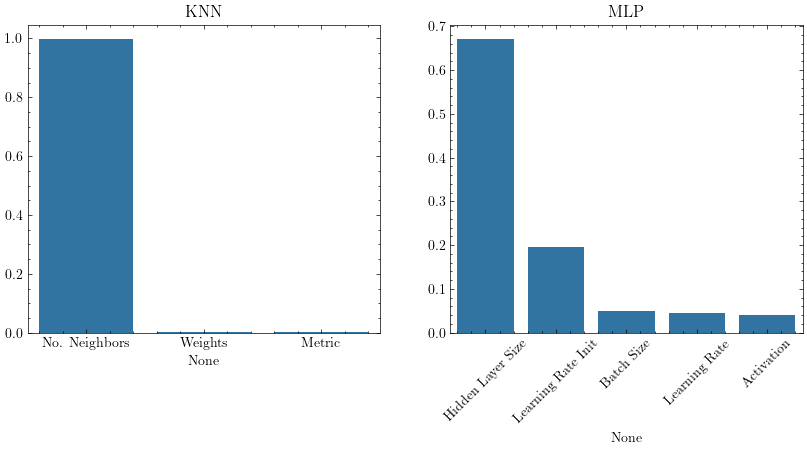

In [20]:
# Hyperparameters Importances
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.barplot(x=knr_param_importances.index, y=knr_param_importances.values, color="tab:blue", ax=axs[0])
sns.barplot(x=mlp_param_importances.index, y=mlp_param_importances.values, color="tab:blue", ax=axs[1])

axs[0].set_title("KNN")
axs[1].set_title("MLP")
axs[0].set_xticks(np.arange(3), ["No. Neighbors", "Weights", "Metric"])
axs[1].set_xticks(np.arange(5), ["Hidden Layer Size", "Learning Rate Init", "Batch Size", "Learning Rate", "Activation"], rotation=45)

plt.savefig("./figures/param_importance")
plt.show()

In [21]:
cmap = sns.color_palette("Blues", as_cmap=True)

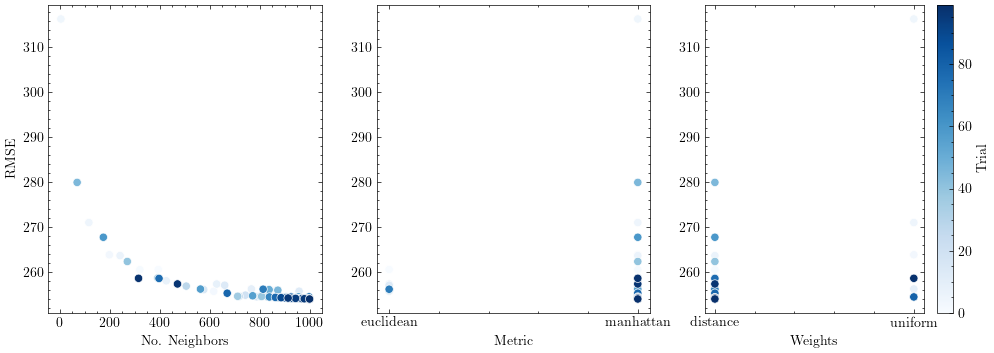

In [22]:
# Hyperparameters Performances (KNR)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
sns.scatterplot(data=knr_trials_df, x="No. Neighbors", y="RMSE", hue="Trial", palette=cmap, legend=False, ax=axs[0])
sns.scatterplot(data=knr_trials_df, x="Metric", y="RMSE", hue="Trial", palette=cmap, legend=False, ax=axs[1])
sns.scatterplot(data=knr_trials_df, x="Weights", y="RMSE", hue="Trial", palette=cmap, legend=False, ax=axs[2])

axs[1].set_ylabel("")
axs[2].set_ylabel("")

dummy_cmap = plt.cm.ScalarMappable(cmap=cmap)
dummy_cmap.set_clim(0, knr_trials_df["Trial"].max())

cbar = plt.colorbar(dummy_cmap, ax=axs[2])
cbar.set_label("Trial")

plt.savefig("./figures/knn_slice")
plt.show()

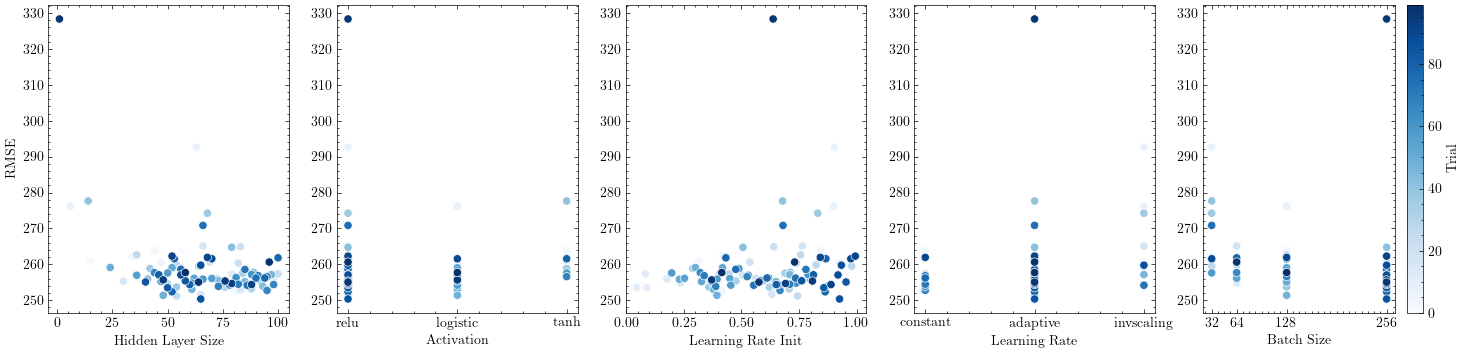

In [23]:
# Hyperparameters Performances (MLP)
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(18, 4))

sns.scatterplot(data=mlp_trials_df, x="Hidden Layer Size", y="RMSE", hue="Trial", palette=cmap, legend=False, ax=axs[0])
sns.scatterplot(data=mlp_trials_df, x="Activation", y="RMSE", hue="Trial", palette=cmap, legend=False, ax=axs[1])
sns.scatterplot(data=mlp_trials_df, x="Learning Rate Init", y="RMSE", hue="Trial", palette=cmap, legend=False, ax=axs[2])
sns.scatterplot(data=mlp_trials_df, x="Learning Rate", y="RMSE", hue="Trial", palette=cmap, legend=False, ax=axs[3])
sns.scatterplot(data=mlp_trials_df, x="Batch Size", y="RMSE", hue="Trial", palette=cmap, legend=False, ax=axs[4])

axs[1].set_ylabel("")
axs[2].set_ylabel("")
axs[3].set_ylabel("")
axs[4].set_ylabel("")
axs[4].set_xticks(np.unique(mlp_trials_df["Batch Size"]), ["32", "64", "128", "256"])

dummy_cmap = plt.cm.ScalarMappable(cmap=cmap)
dummy_cmap.set_clim(0, knr_trials_df["Trial"].max())

cbar = plt.colorbar(dummy_cmap, ax=axs[4])
cbar.set_label("Trial")

plt.savefig("./figures/mlp_slice")
plt.show()

# Evaluate Models

In [24]:
knr_study.best_params

{'n_neighbors': 1000, 'weights': 'distance', 'p': 1}

In [25]:
mlp_study.best_params

{'hidden_layer_size': 65,
 'activation': 'relu',
 'learning_rate_init': 0.9255083780251485,
 'learning_rate': 'adaptive',
 'batch_size': 256}

In [26]:
knr_pipe = Pipeline([("ss", StandardScaler()), ("knr", KNeighborsRegressor(n_neighbors=1000, weights="distance", p=1, n_jobs=-1))])
mlp_pipe = Pipeline([("ss", StandardScaler()),
                     ("mlp", MLPRegressor(hidden_layer_sizes=(41,), activation="relu",
                                         learning_rate="constant", learning_rate_init=0.1937581607625909,
                                         batch_size=256, early_stopping=True, random_state=1, shuffle=True))])

###### 24 hours max

In [27]:
rtt_1day_index_train = np.where(train_y < (24 * 60))[0]
rtt_1day_index_val = np.where(val_y < (24 * 60))[0]
rtt_1day_index_test = np.where(test_y < (24 * 60))[0]

train_X_24 = train_X[rtt_1day_index_train]
train_y_24 = train_y[rtt_1day_index_train]
val_X_24 = val_X[rtt_1day_index_val]
val_y_24 = val_y[rtt_1day_index_val]
test_X_24 = test_X[rtt_1day_index_test]
test_y_24 = test_y[rtt_1day_index_test]

train_X_24 = np.vstack((train_X_24, val_X_24))
train_y_24 = np.hstack((train_y_24, val_y_24))

In [28]:
knr_pipe.fit(train_X_24, train_y_24)
mlp_pipe.fit(train_X_24, train_y_24)

Pipeline(steps=[('ss', StandardScaler()),
                ('mlp',
                 MLPRegressor(batch_size=256, early_stopping=True,
                              hidden_layer_sizes=(41,),
                              learning_rate_init=0.1937581607625909,
                              random_state=1))])

In [29]:
joblib.dump(knr_pipe, "./models/knr_pipe_24_trained.pkl")
joblib.dump(mlp_pipe, "./models/mlp_pipe_24_trained.pkl")

['./models/mlp_pipe_24_trained.pkl']

In [30]:
start = time.time()
knr_preds = knr_pipe.predict(test_X_24)
print(f"K-Nearest Neighbors Prediction Time: {time.time() - start}")

start = time.time()
mlp_preds = mlp_pipe.predict(test_X_24)
print(f"Multilayer Perceptron Prediction Time: {time.time() - start}")

K-Nearest Neighbors Prediction Time: 10.807188510894775
Multilayer Perceptron Prediction Time: 0.031000614166259766


In [31]:
knr_preds_targets_df_24 = pd.DataFrame(data=np.vstack((knr_preds, test_y_24)).T, columns=["Preds", "Targets"])
mlp_preds_targets_df_24 = pd.DataFrame(data=np.vstack((mlp_preds, test_y_24)).T, columns=["Preds", "Targets"])

In [32]:
bins_24 = np.array([-1.0, 4.0, 8.0, 12.0, 16.0, 20.0, 25.0]) * 60
labels_24 = ["0-4", "4-8", "8-12", "12-16", "16-20", "20-24"]
knr_preds_targets_df_24["TargetBinned"] = pd.cut(knr_preds_targets_df_24["Targets"], bins=bins_24, labels=labels_24)
mlp_preds_targets_df_24["TargetBinned"] = pd.cut(mlp_preds_targets_df_24["Targets"], bins=bins_24, labels=labels_24)

In [33]:
mape = mean_absolute_percentage_error(knr_preds_targets_df_24["Targets"], knr_preds_targets_df_24["Preds"])
mae = mean_absolute_error(knr_preds_targets_df_24["Targets"], knr_preds_targets_df_24["Preds"])
rmse = mean_squared_error(knr_preds_targets_df_24["Targets"], knr_preds_targets_df_24["Preds"], squared=False)
r2 = r2_score(knr_preds_targets_df_24["Targets"], knr_preds_targets_df_24["Preds"])

metrics_knr_df_24 = pd.DataFrame(data=[[mape, mae, rmse, r2]],
                                 columns=["MAPE", "MAE", "RMSE", "R2"],
                                 index=["KNN"])

mape = mean_absolute_percentage_error(mlp_preds_targets_df_24["Targets"], mlp_preds_targets_df_24["Preds"])
mae = mean_absolute_error(mlp_preds_targets_df_24["Targets"], mlp_preds_targets_df_24["Preds"])
rmse = mean_squared_error(mlp_preds_targets_df_24["Targets"], mlp_preds_targets_df_24["Preds"], squared=False)
r2 = r2_score(mlp_preds_targets_df_24["Targets"], mlp_preds_targets_df_24["Preds"])

metrics_mlp_df_24 = pd.DataFrame(data=[[mape, mae, rmse, r2]],
                                 columns=["MAPE", "MAE", "RMSE", "R2"],
                                 index=["MLP"])

metrics_df_24 = pd.concat((metrics_knr_df_24, metrics_mlp_df_24), axis=0)

In [34]:
display(metrics_df_24)
print(metrics_df_24.style.to_latex())

,MAPE,MAE,RMSE,R2
KNN,0.228967,110.028997,178.855547,0.787762
MLP,0.235655,110.021850,177.431274,0.791129


\begin{tabular}{lrrrr}
 & MAPE & MAE & RMSE & R2 \\
KNN & 0.228967 & 110.028997 & 178.855547 & 0.787762 \\
MLP & 0.235655 & 110.021850 & 177.431274 & 0.791129 \\
\end{tabular}



In [35]:
knr_preds_targets_df_24["Error"] = knr_preds_targets_df_24["Targets"] - knr_preds_targets_df_24["Preds"]
mlp_preds_targets_df_24["Error"] = mlp_preds_targets_df_24["Targets"] - mlp_preds_targets_df_24["Preds"]

errors_df_24 = pd.concat((knr_preds_targets_df_24["Error"], mlp_preds_targets_df_24["Error"]), axis=1, keys=["KNN", "MLP"])
errors_df_24["TargetBinned"] = mlp_preds_targets_df_24["TargetBinned"]
errors_df_24.set_index(keys="TargetBinned", inplace=True)

errors_df_24 = errors_df_24.melt(value_vars=["KNN", "MLP"], var_name="Model", value_name="Error", ignore_index=False).reset_index()
errors_df_24["AbsError"] = errors_df_24["Error"].abs()

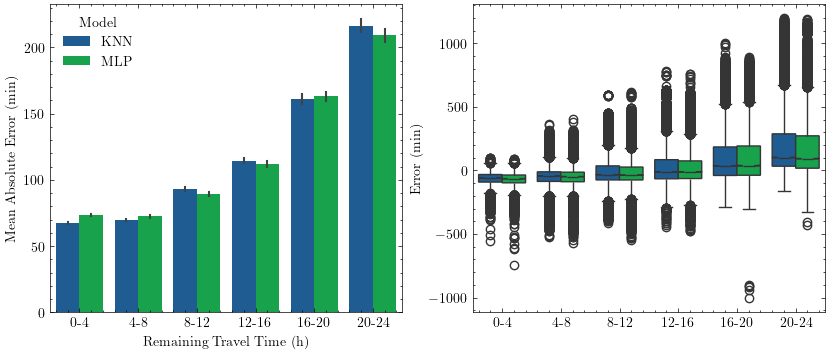

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.barplot(data=errors_df_24, x="TargetBinned", y="AbsError", hue="Model", estimator="mean", ax=axs[0])
axs[0].set_ylabel("Mean Absolute Error (min)")
axs[0].set_xlabel("Remaining Travel Time (h)")

sns.boxplot(data=errors_df_24, x="TargetBinned", y="Error", hue="Model", notch=True, ax=axs[1])
axs[1].set_ylabel("Error (min)")
axs[1].set_xlabel("")
axs[1].get_legend().remove()

plt.savefig("figures/mae_by_time_miami_24")
plt.show()

###### 48 hours max

In [37]:
train_X = np.vstack((train_X, val_X))
train_y = np.hstack((train_y, val_y))

In [38]:
knr_pipe.fit(train_X, train_y)
mlp_pipe.fit(train_X, train_y)

Pipeline(steps=[('ss', StandardScaler()),
                ('mlp',
                 MLPRegressor(batch_size=256, early_stopping=True,
                              hidden_layer_sizes=(41,),
                              learning_rate_init=0.1937581607625909,
                              random_state=1))])

In [39]:
joblib.dump(knr_pipe, "./models/knr_pipe_trained.pkl")
joblib.dump(mlp_pipe, "./models/mlp_pipe_trained.pkl")

['./models/mlp_pipe_trained.pkl']

In [40]:
knr_pipe = joblib.load("./models/knr_pipe_trained.pkl")
mlp_pipe = joblib.load("./models/mlp_pipe_trained.pkl")

In [41]:
start = time.time()
knr_preds = knr_pipe.predict(test_X)
print(f"K-Nearest Neighbors Prediction Time: {time.time() - start}")

start = time.time()
mlp_preds = mlp_pipe.predict(test_X)
print(f"Multilayer Perceptron Prediction Time: {time.time() - start}")

K-Nearest Neighbors Prediction Time: 15.323471784591675
Multilayer Perceptron Prediction Time: 0.04247474670410156


In [42]:
knr_preds_targets_df = pd.DataFrame(data=np.vstack((knr_preds, test_y)).T, columns=["Preds", "Targets"])
mlp_preds_targets_df = pd.DataFrame(data=np.vstack((mlp_preds, test_y)).T, columns=["Preds", "Targets"])

In [43]:
bins = np.array([-1.0, 8.0, 16.0, 24.0, 32.0, 40.0, 49.0]) * 60
labels = ["0-8", "8-16", "16-24", "24-32", "32-40", "40-48"]
knr_preds_targets_df["TargetBinned"] = pd.cut(knr_preds_targets_df["Targets"], bins=bins, labels=labels)
mlp_preds_targets_df["TargetBinned"] = pd.cut(mlp_preds_targets_df["Targets"], bins=bins, labels=labels)

In [44]:
mape = mean_absolute_percentage_error(knr_preds_targets_df["Targets"], knr_preds_targets_df["Preds"])
mae = mean_absolute_error(knr_preds_targets_df["Targets"], knr_preds_targets_df["Preds"])
rmse = mean_squared_error(knr_preds_targets_df["Targets"], knr_preds_targets_df["Preds"], squared=False)
r2 = r2_score(knr_preds_targets_df["Targets"], knr_preds_targets_df["Preds"])

metrics_knr_df = pd.DataFrame(data=[[mape, mae, rmse, r2]],
                                 columns=["MAPE", "MAE", "RMSE", "R2"],
                                 index=["KNN"])

mape = mean_absolute_percentage_error(mlp_preds_targets_df["Targets"], mlp_preds_targets_df["Preds"])
mae = mean_absolute_error(mlp_preds_targets_df["Targets"], mlp_preds_targets_df["Preds"])
rmse = mean_squared_error(mlp_preds_targets_df["Targets"], mlp_preds_targets_df["Preds"], squared=False)
r2 = r2_score(mlp_preds_targets_df["Targets"], mlp_preds_targets_df["Preds"])

metrics_mlp_df = pd.DataFrame(data=[[mape, mae, rmse, r2]],
                                 columns=["MAPE", "MAE", "RMSE", "R2"],
                                 index=["MLP"])

metrics_df = pd.concat((metrics_knr_df, metrics_mlp_df), axis=0)

In [45]:
display(metrics_df)
print(metrics_df.style.to_latex())

,MAPE,MAE,RMSE,R2
KNN,0.264272,181.410295,308.428641,0.750185
MLP,0.254703,179.981452,295.953696,0.769985


\begin{tabular}{lrrrr}
 & MAPE & MAE & RMSE & R2 \\
KNN & 0.264272 & 181.410295 & 308.428641 & 0.750185 \\
MLP & 0.254703 & 179.981452 & 295.953696 & 0.769985 \\
\end{tabular}



In [46]:
knr_preds_targets_df["Error"] = knr_preds_targets_df["Targets"] - knr_preds_targets_df["Preds"]
mlp_preds_targets_df["Error"] = mlp_preds_targets_df["Targets"] - mlp_preds_targets_df["Preds"]

errors_df = pd.concat((knr_preds_targets_df["Error"], mlp_preds_targets_df["Error"]), axis=1, keys=["KNN", "MLP"])
errors_df["TargetBinned"] = mlp_preds_targets_df["TargetBinned"]
errors_df.set_index(keys="TargetBinned", inplace=True)

errors_df = errors_df.melt(value_vars=["KNN", "MLP"], var_name="Model", value_name="Error", ignore_index=False).reset_index()
errors_df["AbsError"] = errors_df["Error"].abs()

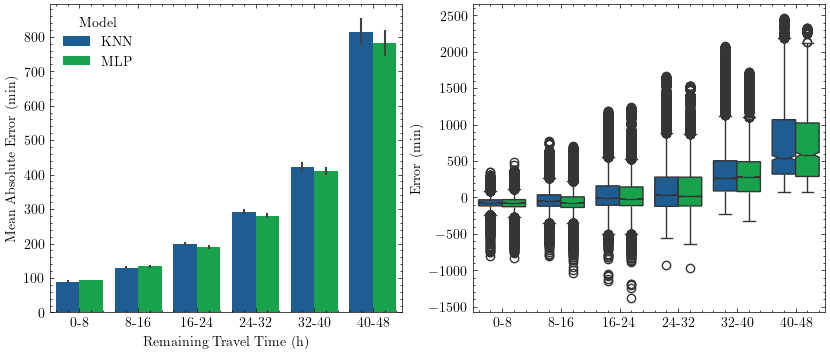

In [47]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.barplot(data=errors_df, x="TargetBinned", y="AbsError", hue="Model", estimator="mean", ax=axs[0])
axs[0].set_ylabel("Mean Absolute Error (min)")
axs[0].set_xlabel("Remaining Travel Time (h)")

sns.boxplot(data=errors_df, x="TargetBinned", y="Error", hue="Model", notch=True , ax=axs[1])
axs[1].set_ylabel("Error (min)")
axs[1].set_xlabel("")
axs[1].get_legend().remove()

plt.savefig("./figures/mae_by_time_miami_48")
plt.show()

# Test on the 2nd dataset

In [48]:
train = pd.read_csv("./data/final_france_datasets/no_history/train.csv", index_col=[0,1])
train_X = train.iloc[:, :-1]
train_y = train.iloc[:, -1]

val = pd.read_csv("./data/final_france_datasets/no_history/val.csv")
val_X = val.iloc[:, :-1]
val_y = val.iloc[:, -1]

test = pd.read_csv("./data/final_france_datasets/no_history/test.csv")
test_X = test.iloc[:, :-1]
test_y = test.iloc[:, -1]

In [49]:
train_X = train_X.values
train_y = train_y.values
val_X = val_X.values
val_y = val_y.values
test_X = test_X.values
test_y = test_y.values

In [50]:
train_X = np.vstack((train_X, val_X))
train_y = np.hstack((train_y, val_y))

In [51]:
knr_pipe.fit(train_X, train_y)
mlp_pipe.fit(train_X, train_y)

Pipeline(steps=[('ss', StandardScaler()),
                ('mlp',
                 MLPRegressor(batch_size=256, early_stopping=True,
                              hidden_layer_sizes=(41,),
                              learning_rate_init=0.1937581607625909,
                              random_state=1))])

In [52]:
joblib.dump(knr_pipe, "./models/knr_pipe_trained_france.pkl")
joblib.dump(mlp_pipe, "./models/mlp_pipe_trained_france.pkl")

['./models/mlp_pipe_trained_france.pkl']

In [53]:
knr_pipe = joblib.load("./models/knr_pipe_trained_france.pkl")
mlp_pipe = joblib.load("./models/mlp_pipe_trained_france.pkl")

In [54]:
start = time.time()
knr_preds = knr_pipe.predict(test_X)
print(time.time() - start)

0.3378279209136963


In [55]:
start = time.time()
mlp_preds = mlp_pipe.predict(test_X)
print(time.time() - start)

0.0010013580322265625


In [56]:
knr_preds_targets_df = pd.DataFrame(data=np.vstack((knr_preds, test_y)).T, columns=["Preds", "Targets"])
mlp_preds_targets_df = pd.DataFrame(data=np.vstack((mlp_preds, test_y)).T, columns=["Preds", "Targets"])

In [57]:
bins = np.array([-1.0, 8.0, 16.0, 24.0, 32.0, 40.0, 49.0]) * 60
labels = ["0-8", "8-16", "16-24", "24-32", "32-40", "40-48"]
knr_preds_targets_df["TargetBinned"] = pd.cut(knr_preds_targets_df["Targets"], bins=bins, labels=labels)
mlp_preds_targets_df["TargetBinned"] = pd.cut(mlp_preds_targets_df["Targets"], bins=bins, labels=labels)

In [58]:
mape = mean_absolute_percentage_error(knr_preds_targets_df["Targets"], knr_preds_targets_df["Preds"])
mae = mean_absolute_error(knr_preds_targets_df["Targets"], knr_preds_targets_df["Preds"])
rmse = mean_squared_error(knr_preds_targets_df["Targets"], knr_preds_targets_df["Preds"], squared=False)
r2 = r2_score(knr_preds_targets_df["Targets"], knr_preds_targets_df["Preds"])

metrics_knr_df = pd.DataFrame(data=[[mape, mae, rmse, r2]],
                                 columns=["MAPE", "MAE", "RMSE", "R2"],
                                 index=["KNN"])

mape = mean_absolute_percentage_error(mlp_preds_targets_df["Targets"], mlp_preds_targets_df["Preds"])
mae = mean_absolute_error(mlp_preds_targets_df["Targets"], mlp_preds_targets_df["Preds"])
rmse = mean_squared_error(mlp_preds_targets_df["Targets"], mlp_preds_targets_df["Preds"], squared=False)
r2 = r2_score(mlp_preds_targets_df["Targets"], mlp_preds_targets_df["Preds"])

metrics_mlp_df = pd.DataFrame(data=[[mape, mae, rmse, r2]],
                                 columns=["MAPE", "MAE", "RMSE", "R2"],
                                 index=["MLP"])

metrics_df = pd.concat((metrics_knr_df, metrics_mlp_df), axis=0)

In [59]:
display(metrics_df)
print(metrics_df.style.to_latex())

,MAPE,MAE,RMSE,R2
KNN,1.982544e+15,287.018207,502.375429,0.348290
MLP,2.492969e+15,287.889424,502.994217,0.346683


\begin{tabular}{lrrrr}
 & MAPE & MAE & RMSE & R2 \\
KNN & 1982544177743726.500000 & 287.018207 & 502.375429 & 0.348290 \\
MLP & 2492969079137422.500000 & 287.889424 & 502.994217 & 0.346683 \\
\end{tabular}



In [60]:
knr_preds_targets_df["Error"] = knr_preds_targets_df["Targets"] - knr_preds_targets_df["Preds"]
mlp_preds_targets_df["Error"] = mlp_preds_targets_df["Targets"] - mlp_preds_targets_df["Preds"]

errors_df = pd.concat((knr_preds_targets_df["Error"], mlp_preds_targets_df["Error"]), axis=1, keys=["KNN", "MLP"])
errors_df["TargetBinned"] = mlp_preds_targets_df["TargetBinned"]
errors_df.set_index(keys="TargetBinned", inplace=True)

errors_df = errors_df.melt(value_vars=["KNN", "MLP"], var_name="Model", value_name="Error", ignore_index=False).reset_index()
errors_df["AbsError"] = errors_df["Error"].abs()

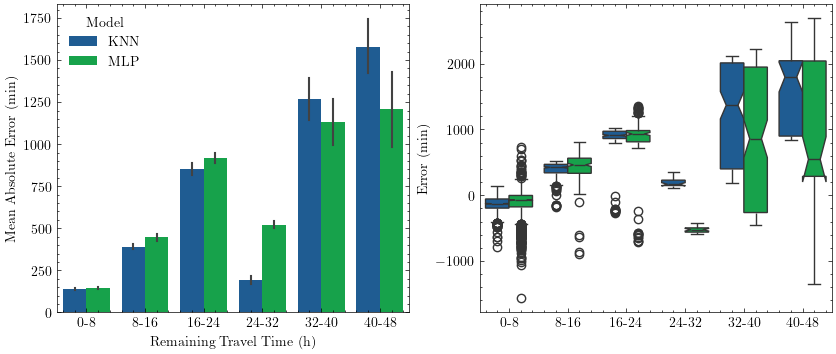

In [61]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.barplot(data=errors_df, x="TargetBinned", y="AbsError", hue="Model", estimator="mean", ax=axs[0])
axs[0].set_ylabel("Mean Absolute Error (min)")
axs[0].set_xlabel("Remaining Travel Time (h)")

sns.boxplot(data=errors_df, x="TargetBinned", y="Error", hue="Model", notch=True , ax=axs[1])
axs[1].set_ylabel("Error (min)")
axs[1].set_xlabel("")
axs[1].get_legend().remove()

plt.savefig("./figures/mae_by_time_france_48")
plt.show()